In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train_cleaned.csv')

In [3]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [4]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']
x.shape,y.shape

((8523, 45), (8523,))

In [6]:
#Scaling the data using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [7]:
x=pd.DataFrame(x_scaled)

In [10]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [12]:
reg=KNN(n_neighbors=5)
reg.fit(train_x,train_y)
test_predict=reg.predict(test_x)
k=mse(test_predict,test_y)
print(k)

1468923.9039826563


In [14]:
def Elbow(k):
    test_mse=[]
    
    for i in k:
        reg=KNN(n_neighbors = i)
        reg.fit(train_x,train_y)
        temp=reg.predict(test_x)
        temp=mse(temp,test_y)
        test_mse.append(temp)
    return test_mse

In [15]:
k=range(1,40)

In [16]:
test=Elbow(k)

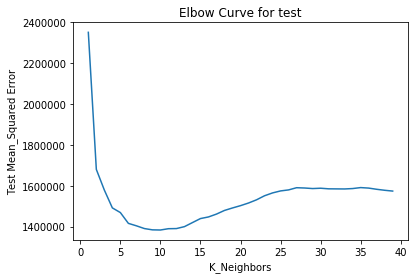

In [17]:
plt.plot(k,test)
plt.xlabel('K_Neighbors')
plt.ylabel('Test Mean_Squared Error')
plt.title('Elbow Curve for test')
plt.show()

In [19]:
#Min error approx is at 9 so
reg=KNN(n_neighbors=9)
reg.fit(train_x,train_y)
test_predict=reg.predict(test_x)
k=mse(test_predict,test_y)
print('Test MSE value',k)


Test MSE value 1384467.531644614
